In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!git clone https://github.com/a11to1n3/OCPCO.git
%cd OCPCO
from CS_Main import *
from PSOGSA_Main import *
from GSA_Main import *
from PSO_Main import *
from Ant_Main import *
from Firefly_Main import *
from google.colab import files
files.upload()

Cloning into 'OCPCO'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 54 (delta 25), reused 39 (delta 15), pack-reused 0
Unpacking objects: 100% (54/54), done.
/content/OCPCO


Saving INPUTS.csv to INPUTS.csv


{'INPUTS.csv': b'\xef\xbb\xbfRelay_Number,N,CT,Ipick,FC,TOP_Desired,Tolerance_Dn,Discrimination_Time,MinTop,MaxTop,MinC1,MaxC1,MinC2,MaxC2,MinC3,MaxC3,MinTDS,MaxTDS,MinIDMT,I50n,A,B,C\r\n1,50,1000,1000,2400,0.01,0.001,0.04,0,0.75,0.0086,150,0.02,2.5,0,1.5,0.01,3.2,0,3000,0.086,0.02,0.185\r\n2,50,1000,1000,2400,0.2,0.001,0.1,0,0.75,0.0086,150,0.02,2.5,0,1.5,0.01,3.2,0.2,5000,0.086,0.02,0.185\r\n3,50,1000,1000,2400,0.4,0.001,0.2,0,0.75,0.0086,150,0.02,2.5,0,1.5,0.01,3.2,0.2,6000,0.086,0.02,0.185\r\n4,50,1000,1000,2400,0.6,0.001,0.3,0,0.75,0.0086,150,0.02,2.5,0,1.5,0.01,3.2,0.2,7000,0.086,0.02,0.185'}

In [2]:
input_file = np.array(pd.read_csv('INPUTS.csv'))

# Firefly

## Fixed ABC - IECType

0
1
2
3


TypeError: ignored

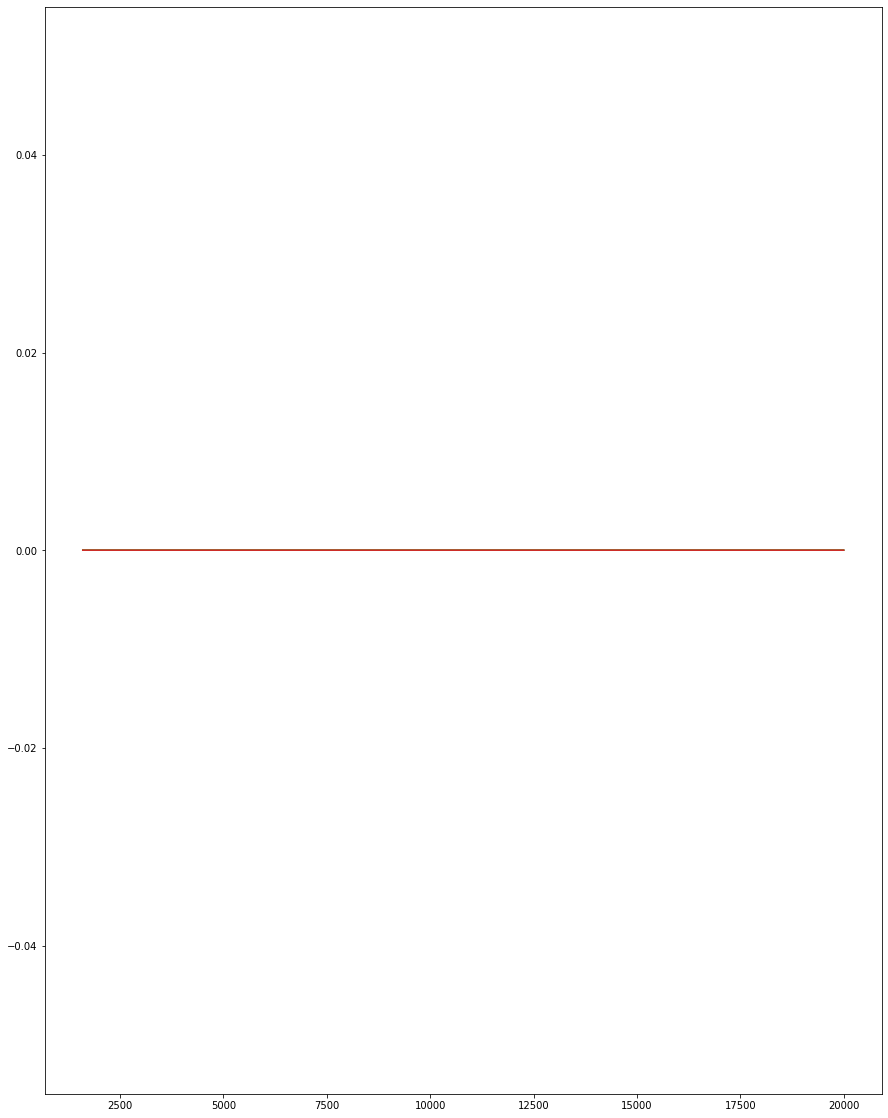

In [8]:
output_file = Firefly_Main(input_file,True,IECType=True,FixABC=True)
MaxOpt = 0
gmin = 1.6
gmax = 20
plotI50n = True
nRelay=len(input_file[:,0])
output_file = np.array(output_file)
plt.figure(figsize=(15,20))
for i in range(nRelay):
  Ip = input_file[i,3]
  I51 = input_file[i,4]
  TDS = input_file[i,0]
  A = output_file[0][i][1]
  B = output_file[0][i][2]
  C = output_file[0][i][3]
  I50n = input_file[i,19]
  If = np.linspace(gmin*Ip, gmax*Ip, num=10000)
  t = np.zeros((len(If),1))         # allocate y with float elements
  for j in range(len(If)):
    if (If[j]/Ip)**B < 1:
      continue
    else:
      if ((operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)<50) and (operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)>0)):
        t[j] = operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)
  plt.plot(If,np.array(t).reshape(-1),label=f"Relay {i}")
  MaxOpt = max(MaxOpt,max(t))
plt.vlines(I51,0,MaxOpt[0],linestyles='dashdot')
plt.grid(True)
plt.xlabel('Ampere [A]')
plt.ylabel('Operating Time [Seconds]')
plt.ylim(0,0.2)
plt.title('Results of Protection Coordination Curves of OC/DOC Protection Devices')
plt.legend()
plt.show()

## No fix ABC - IECType

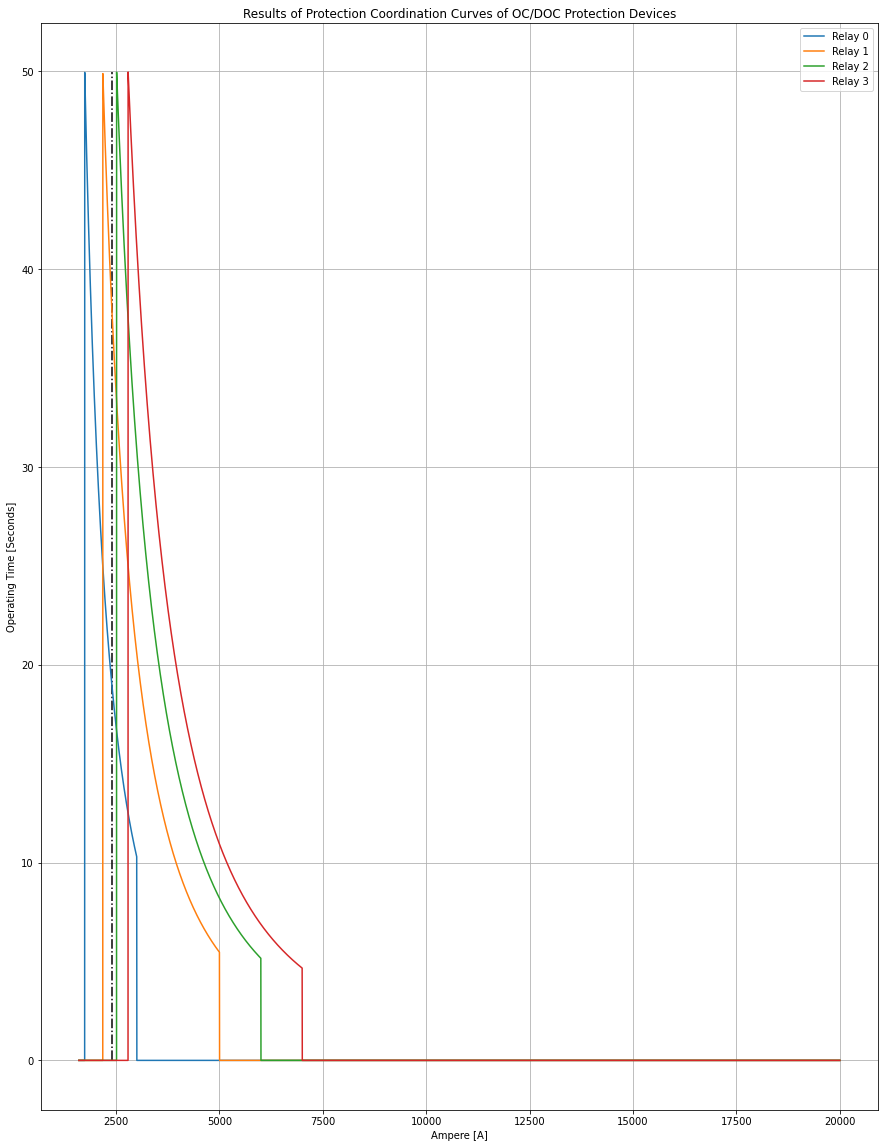

In [11]:
output_file = Firefly_Main(input_file,True,IECType=True,FixABC=False)
MaxOpt = 0
gmin = 1.6
gmax = 20
plotI50n = True
nRelay=len(input_file[:,0])
output_file = np.array(output_file)
plt.figure(figsize=(15,20))
for i in range(nRelay):
  Ip = input_file[i,3]
  I51 = input_file[i,4]
  TDS = input_file[i,0]
  A = output_file[0][i][1]
  B = output_file[0][i][2]
  C = output_file[0][i][3]
  I50n = input_file[i,19]
  If = np.linspace(gmin*Ip, gmax*Ip, num=10000)
  t = np.zeros((len(If),1))         # allocate y with float elements
  for j in range(len(If)):
    if (If[j]/Ip)**B < 1:
      continue
    else:
      if ((operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)<50) and (operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)>0)):
        t[j] = operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)
  plt.plot(If,np.array(t).reshape(-1),label=f"Relay {i}")
  MaxOpt = max(MaxOpt,max(t))
plt.vlines(I51,0,MaxOpt[0],linestyles='dashdot')
plt.grid(True)
plt.xlabel('Ampere [A]')
plt.ylabel('Operating Time [Seconds]')
# plt.ylim(0,0.2)
plt.title('Results of Protection Coordination Curves of OC/DOC Protection Devices')
plt.legend()
plt.show()

## Fixed ABC - IEEE Type

0
1
2
3


TypeError: ignored

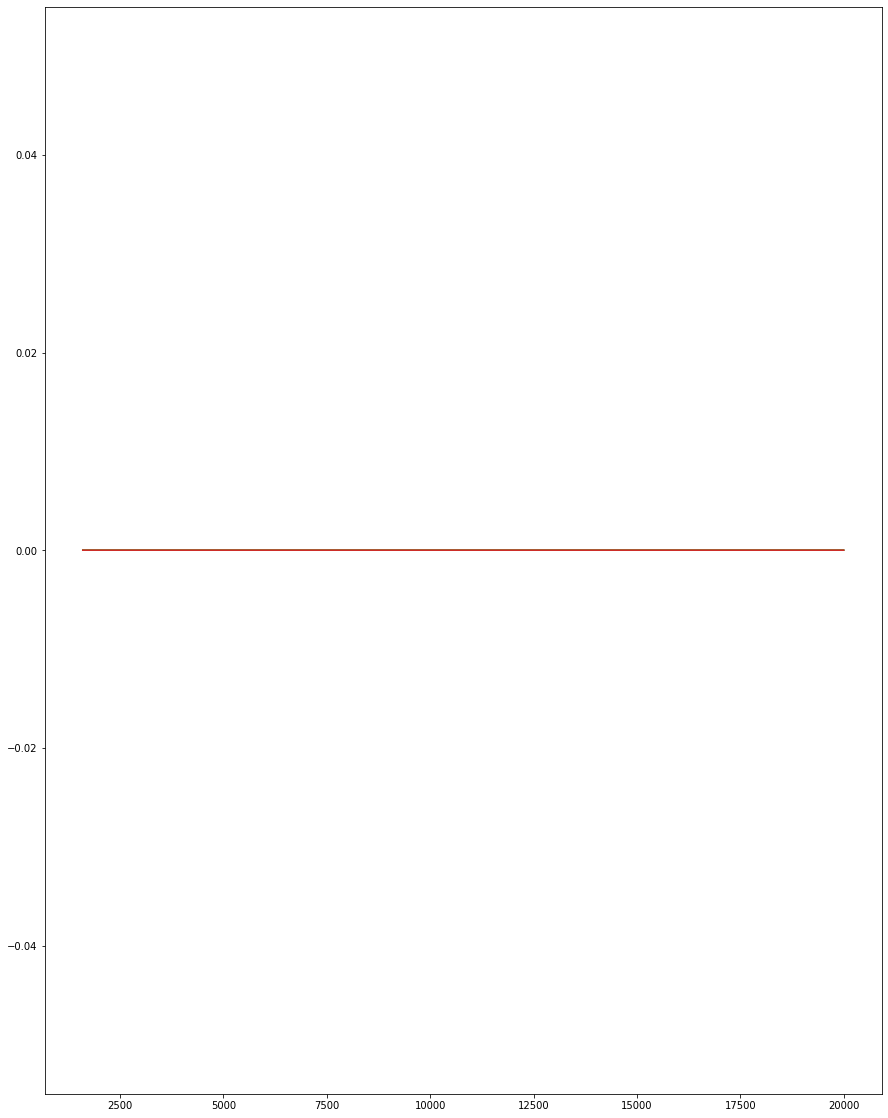

In [12]:
output_file = Firefly_Main(input_file,True,IECType=False,FixABC=True)
MaxOpt = 0
gmin = 1.6
gmax = 20
plotI50n = True
nRelay=len(input_file[:,0])
output_file = np.array(output_file)
plt.figure(figsize=(15,20))
for i in range(nRelay):
  Ip = input_file[i,3]
  I51 = input_file[i,4]
  TDS = input_file[i,0]
  A = output_file[0][i][1]
  B = output_file[0][i][2]
  C = output_file[0][i][3]
  I50n = input_file[i,19]
  If = np.linspace(gmin*Ip, gmax*Ip, num=10000)
  t = np.zeros((len(If),1))         # allocate y with float elements
  for j in range(len(If)):
    if (If[j]/Ip)**B < 1:
      continue
    else:
      if ((operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)<50) and (operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)>0)):
        t[j] = operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)
  plt.plot(If,np.array(t).reshape(-1),label=f"Relay {i}")
  MaxOpt = max(MaxOpt,max(t))
plt.vlines(I51,0,MaxOpt[0],linestyles='dashdot')
plt.grid(True)
plt.xlabel('Ampere [A]')
plt.ylabel('Operating Time [Seconds]')
plt.ylim(0,0.2)
plt.title('Results of Protection Coordination Curves of OC/DOC Protection Devices')
plt.legend()
plt.show()

## No fix ABC - IEEE Type

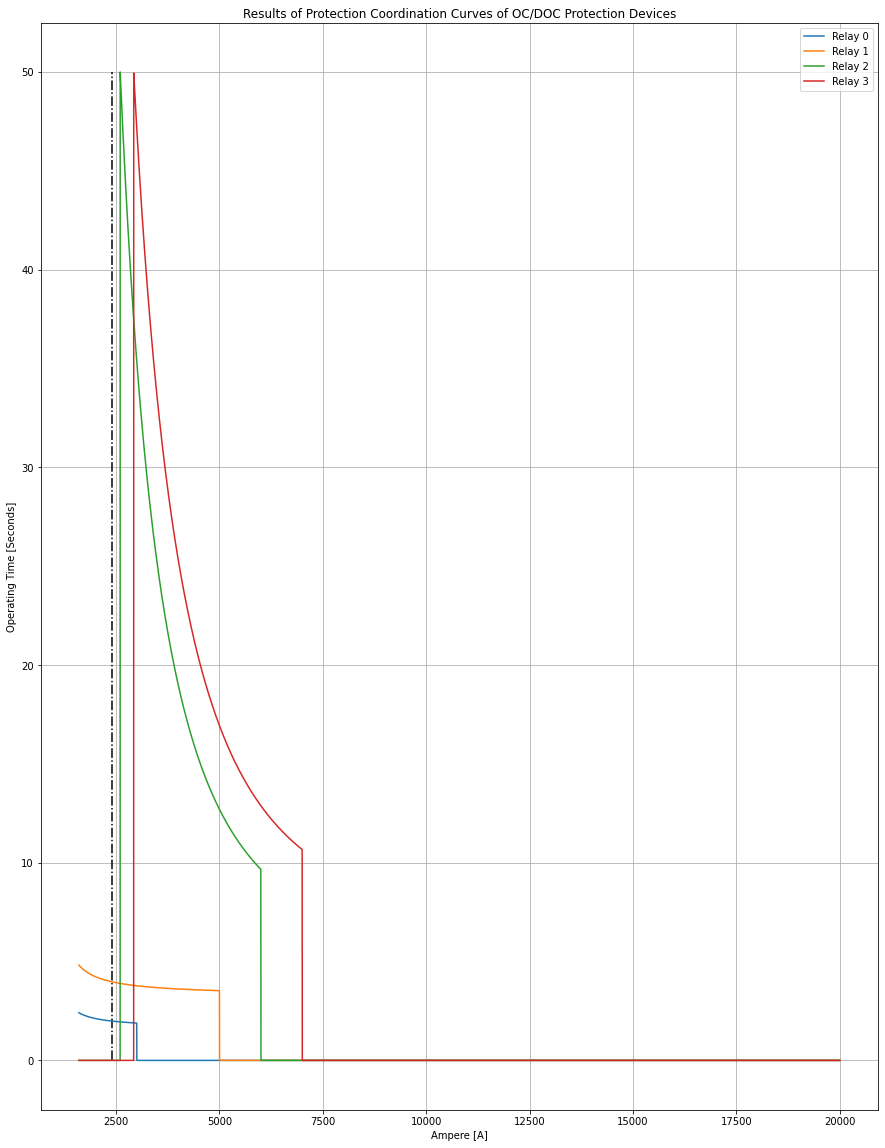

In [15]:
output_file = Firefly_Main(input_file,True,IECType=False,FixABC=False)
MaxOpt = 0
gmin = 1.6
gmax = 20
plotI50n = True
nRelay=len(input_file[:,0])
output_file = np.array(output_file)
plt.figure(figsize=(15,20))
for i in range(nRelay):
  Ip = input_file[i,3]
  I51 = input_file[i,4]
  TDS = input_file[i,0]
  A = output_file[0][i][1]
  B = output_file[0][i][2]
  C = output_file[0][i][3]
  I50n = input_file[i,19]
  If = np.linspace(gmin*Ip, gmax*Ip, num=10000)
  t = np.zeros((len(If),1))         # allocate y with float elements
  for j in range(len(If)):
    if (If[j]/Ip)**B < 1:
      continue
    else:
      if ((operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)<50) and (operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)>0)):
        t[j] = operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)
  plt.plot(If,np.array(t).reshape(-1),label=f"Relay {i}")
  MaxOpt = max(MaxOpt,max(t))
plt.vlines(I51,0,MaxOpt[0],linestyles='dashdot')
plt.grid(True)
plt.xlabel('Ampere [A]')
plt.ylabel('Operating Time [Seconds]')
# plt.ylim(0,0.2)
plt.title('Results of Protection Coordination Curves of OC/DOC Protection Devices')
plt.legend()
plt.show()

# AntLion

## Fixed ABC - IECType

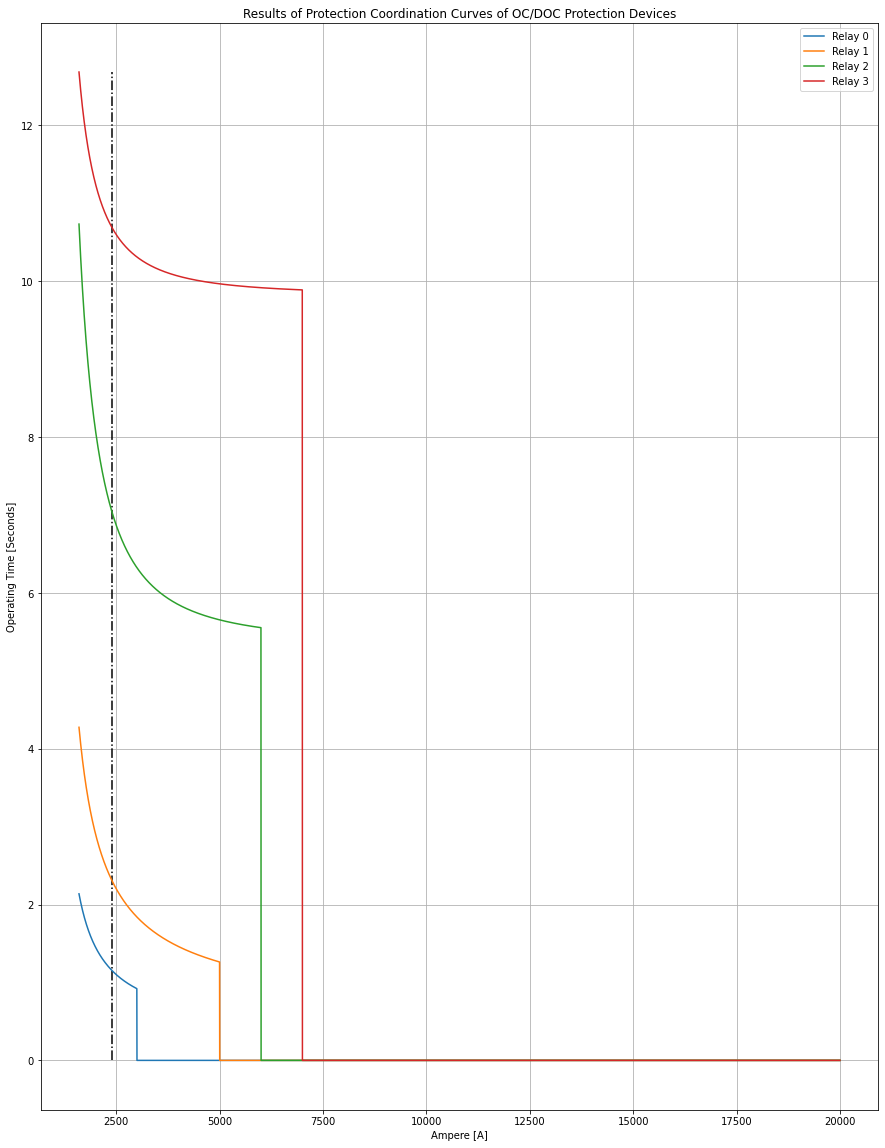

In [17]:
output_file = Ant_Main(input_file,True,IECType=True,FixABC=True)
MaxOpt = 0
gmin = 1.6
gmax = 20
plotI50n = True
nRelay=len(input_file[:,0])
output_file = np.array(output_file)
plt.figure(figsize=(15,20))
for i in range(nRelay):
  Ip = input_file[i,3]
  I51 = input_file[i,4]
  TDS = input_file[i,0]
  A = output_file[0][i][1]
  B = output_file[0][i][2]
  C = output_file[0][i][3]
  I50n = input_file[i,19]
  If = np.linspace(gmin*Ip, gmax*Ip, num=10000)
  t = np.zeros((len(If),1))         # allocate y with float elements
  for j in range(len(If)):
    if (If[j]/Ip)**B < 1:
      continue
    else:
      if ((operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)<50) and (operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)>0)):
        t[j] = operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)
  plt.plot(If,np.array(t).reshape(-1),label=f"Relay {i}")
  MaxOpt = max(MaxOpt,max(t))
plt.vlines(I51,0,MaxOpt[0],linestyles='dashdot')
plt.grid(True)
plt.xlabel('Ampere [A]')
plt.ylabel('Operating Time [Seconds]')
# plt.ylim(0,0.2)
plt.title('Results of Protection Coordination Curves of OC/DOC Protection Devices')
plt.legend()
plt.show()

## No fix ABC - IECType

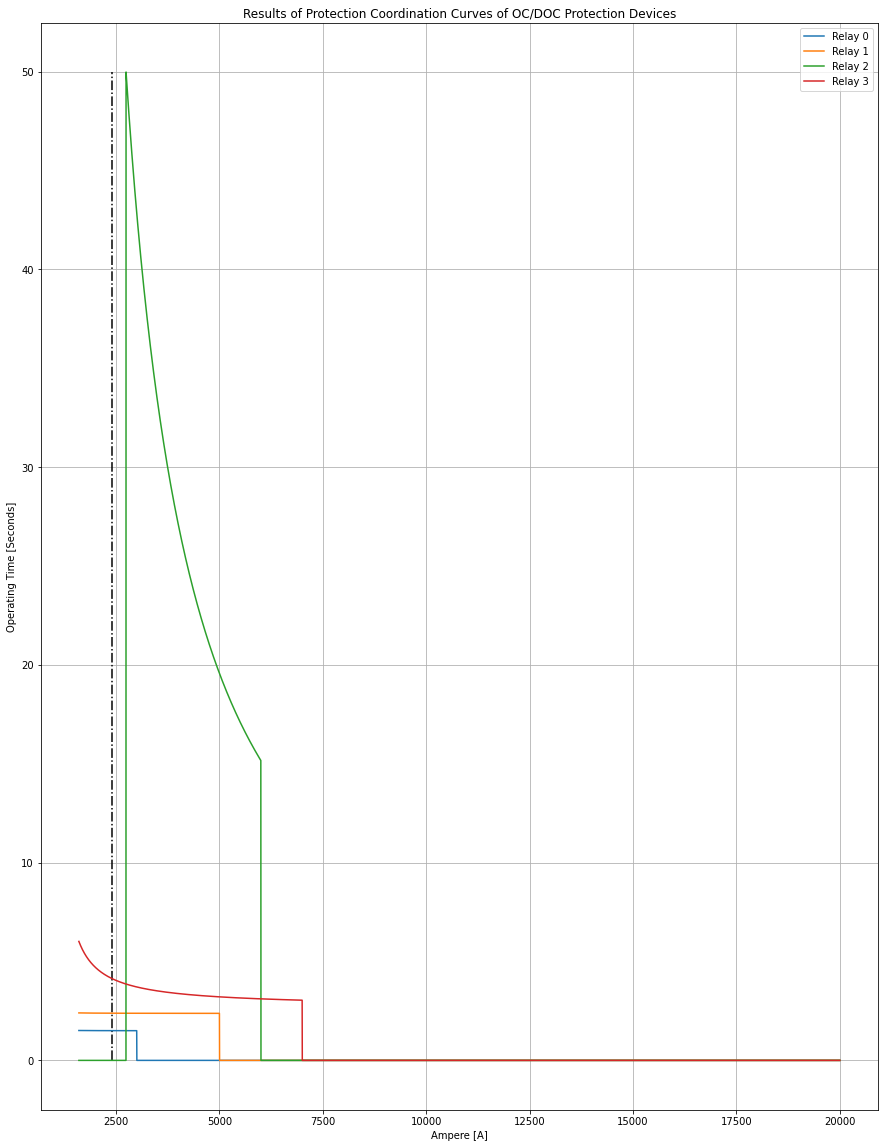

In [20]:
output_file = Ant_Main(input_file,True,IECType=True,FixABC=False)
MaxOpt = 0
gmin = 1.6
gmax = 20
plotI50n = True
nRelay=len(input_file[:,0])
output_file = np.array(output_file)
plt.figure(figsize=(15,20))
for i in range(nRelay):
  Ip = input_file[i,3]
  I51 = input_file[i,4]
  TDS = input_file[i,0]
  A = output_file[0][i][1]
  B = output_file[0][i][2]
  C = output_file[0][i][3]
  I50n = input_file[i,19]
  If = np.linspace(gmin*Ip, gmax*Ip, num=10000)
  t = np.zeros((len(If),1))         # allocate y with float elements
  for j in range(len(If)):
    if (If[j]/Ip)**B < 1:
      continue
    else:
      if ((operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)<50) and (operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)>0)):
        t[j] = operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)
  plt.plot(If,np.array(t).reshape(-1),label=f"Relay {i}")
  MaxOpt = max(MaxOpt,max(t))
plt.vlines(I51,0,MaxOpt[0],linestyles='dashdot')
plt.grid(True)
plt.xlabel('Ampere [A]')
plt.ylabel('Operating Time [Seconds]')
# plt.ylim(0,0.2)
plt.title('Results of Protection Coordination Curves of OC/DOC Protection Devices')
plt.legend()
plt.show()

## Fixed ABC - IEEE Type

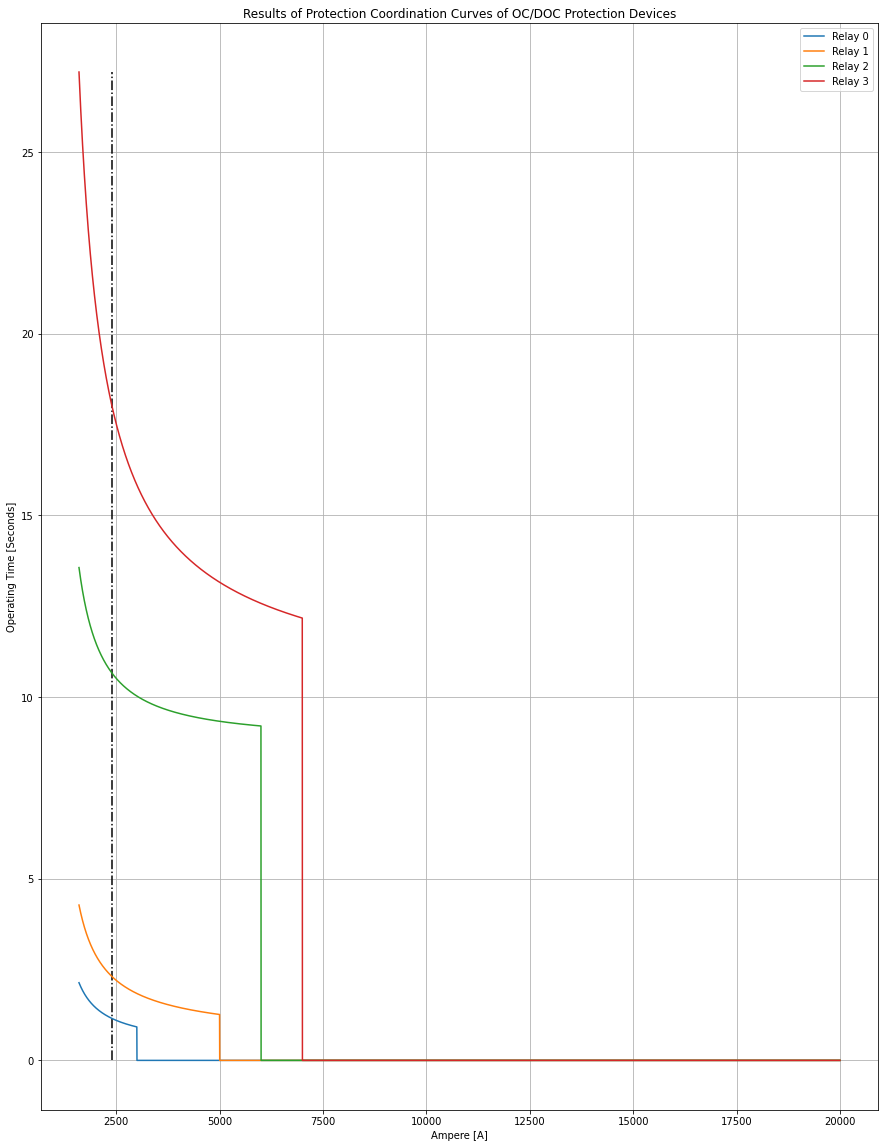

In [22]:
output_file = Ant_Main(input_file,True,IECType=False,FixABC=True)
MaxOpt = 0
gmin = 1.6
gmax = 20
plotI50n = True
nRelay=len(input_file[:,0])
output_file = np.array(output_file)
plt.figure(figsize=(15,20))
for i in range(nRelay):
  Ip = input_file[i,3]
  I51 = input_file[i,4]
  TDS = input_file[i,0]
  A = output_file[0][i][1]
  B = output_file[0][i][2]
  C = output_file[0][i][3]
  I50n = input_file[i,19]
  If = np.linspace(gmin*Ip, gmax*Ip, num=10000)
  t = np.zeros((len(If),1))         # allocate y with float elements
  for j in range(len(If)):
    if (If[j]/Ip)**B < 1:
      continue
    else:
      if ((operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)<50) and (operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)>0)):
        t[j] = operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)
  plt.plot(If,np.array(t).reshape(-1),label=f"Relay {i}")
  MaxOpt = max(MaxOpt,max(t))
plt.vlines(I51,0,MaxOpt[0],linestyles='dashdot')
plt.grid(True)
plt.xlabel('Ampere [A]')
plt.ylabel('Operating Time [Seconds]')
# plt.ylim(0,0.2)
plt.title('Results of Protection Coordination Curves of OC/DOC Protection Devices')
plt.legend()
plt.show()

## No fix ABC - IEEE Type

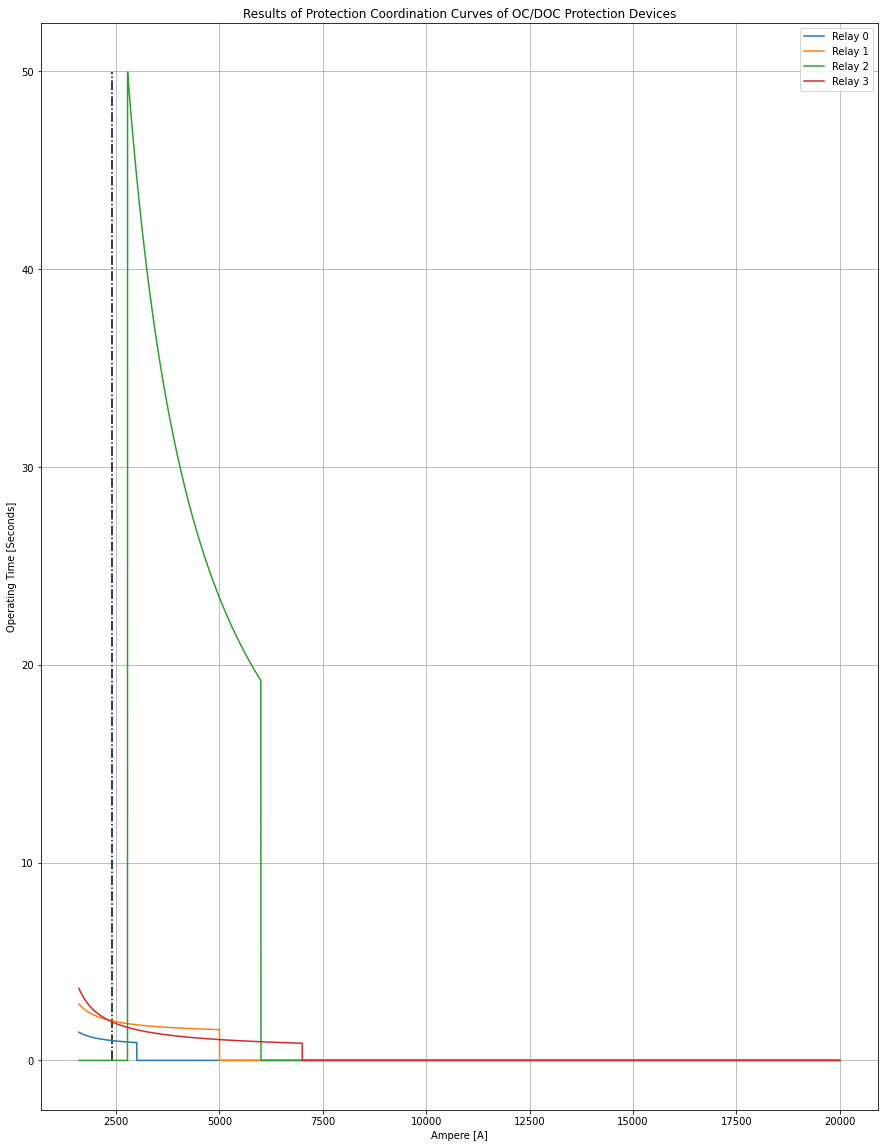

In [24]:
# output_file = Ant_Main(input_file,True,IECType=False,FixABC=False)
MaxOpt = 0
gmin = 1.6
gmax = 20
plotI50n = True
nRelay=len(input_file[:,0])
output_file = np.array(output_file)
plt.figure(figsize=(15,20))
for i in range(nRelay):
  Ip = input_file[i,3]
  I51 = input_file[i,4]
  TDS = input_file[i,0]
  A = output_file[0][i][1]
  B = output_file[0][i][2]
  C = output_file[0][i][3]
  I50n = input_file[i,19]
  If = np.linspace(gmin*Ip, gmax*Ip, num=10000)
  t = np.zeros((len(If),1))         # allocate y with float elements
  for j in range(len(If)):
    if (If[j]/Ip)**B < 1:
      continue
    else:
      if ((operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)<50) and (operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)>0)):
        t[j] = operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)
  plt.plot(If,np.array(t).reshape(-1),label=f"Relay {i}")
  MaxOpt = max(MaxOpt,max(t))
plt.vlines(I51,0,MaxOpt[0],linestyles='dashdot')
plt.grid(True)
plt.xlabel('Ampere [A]')
plt.ylabel('Operating Time [Seconds]')
# plt.ylim(0,0.2)
plt.title('Results of Protection Coordination Curves of OC/DOC Protection Devices')
plt.legend()
plt.show()

# Cuckoo Search Algorithm

0
1
2
3


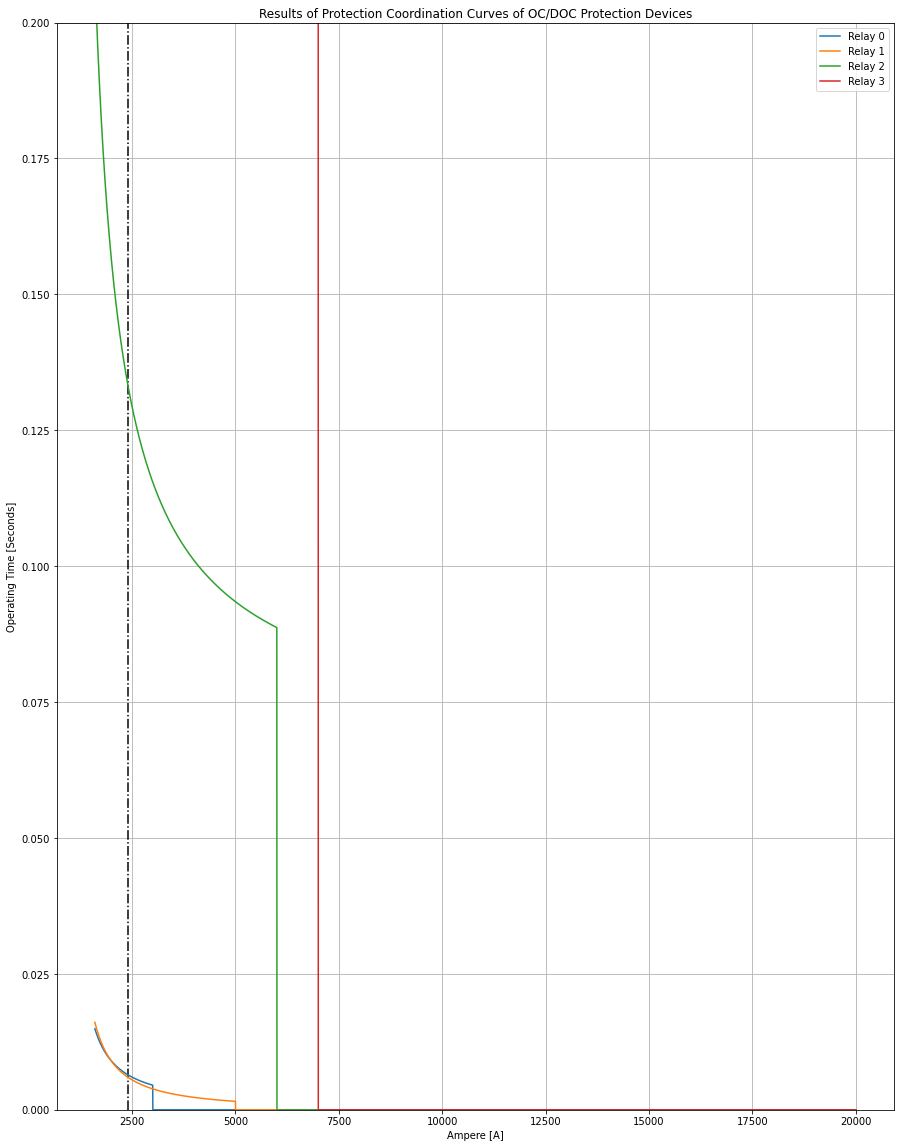

In [ ]:
output_file = Cuckoo_Main(input_file,True)
MaxOpt = 0
gmin = 1.6
gmax = 20
plotI50n = True
nRelay=len(input_file[:,0])
output_file = np.array(output_file)
plt.figure(figsize=(15,20))
for i in range(nRelay):
  Ip = input_file[i,3]
  I51 = input_file[i,4]
  TDS = input_file[i,0]
  A = output_file[0][i][1]
  B = output_file[0][i][2]
  C = output_file[0][i][3]
  I50n = input_file[i,19]
  If = np.linspace(gmin*Ip, gmax*Ip, num=10000)
  t = np.zeros((len(If),1))         # allocate y with float elements
  for j in range(len(If)):
    if (If[j]/Ip)**B < 1:
      continue
    else:
      if ((operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)<50) and (operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)>0)):
        t[j] = operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)
  plt.plot(If,np.array(t).reshape(-1),label=f"Relay {i}")
  MaxOpt = max(MaxOpt,max(t))
plt.vlines(I51,0,MaxOpt[0],linestyles='dashdot')
plt.grid(True)
plt.xlabel('Ampere [A]')
plt.ylabel('Operating Time [Seconds]')
plt.ylim(0,0.2)
plt.title('Results of Protection Coordination Curves of OC/DOC Protection Devices')
plt.legend()
plt.show()

# PSOGSA

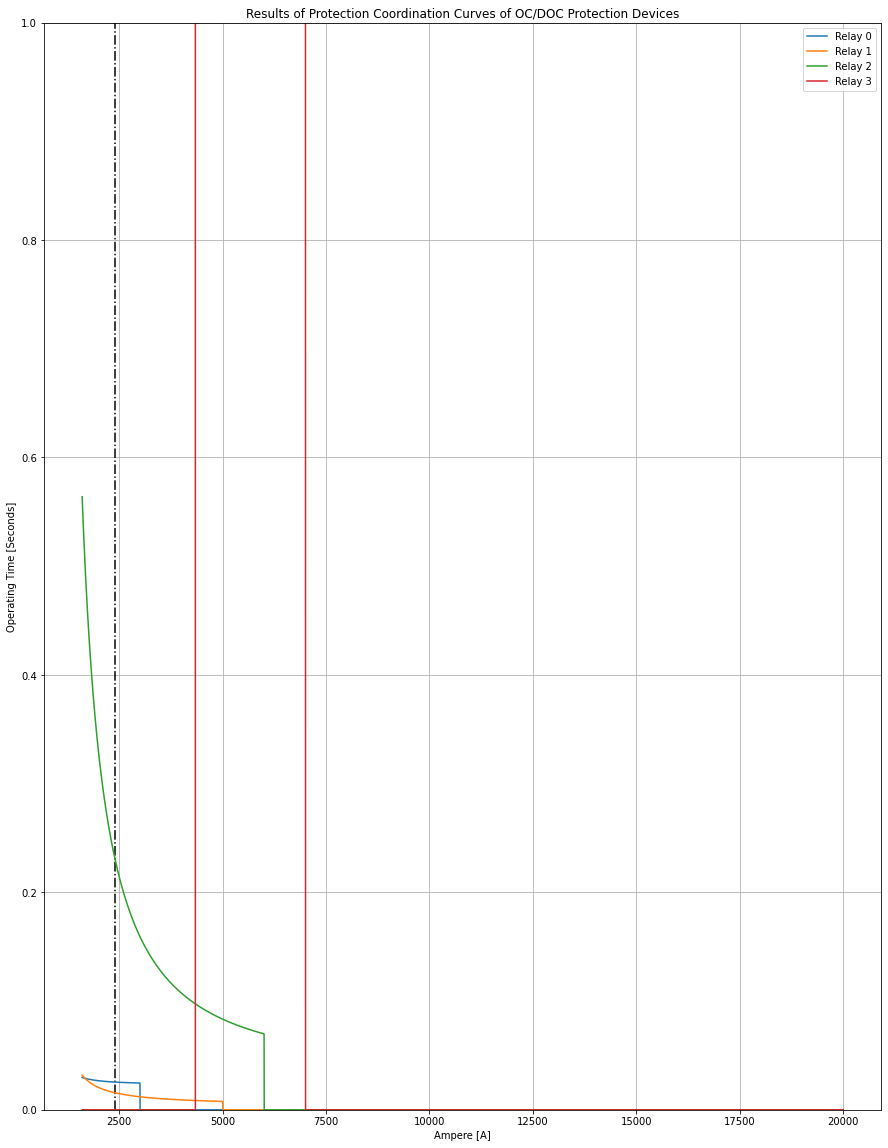

In [ ]:
output_file = PSOGSA_Main(input_file,True)
MaxOpt = 0
gmin = 1.6
gmax = 20
plotI50n = True
nRelay=len(input_file[:,0])
output_file = np.array(output_file)
plt.figure(figsize=(15,20))
for i in range(nRelay):
  Ip = input_file[i,3]
  I51 = input_file[i,4]
  TDS = input_file[i,0]
  A = output_file[0][i][1]
  B = output_file[0][i][2]
  C = output_file[0][i][3]
  I50n = input_file[i,19]
  If = np.linspace(gmin*Ip, gmax*Ip, num=10000)
  t = np.zeros((len(If),1))         # allocate y with float elements
  for j in range(len(If)):
    if (If[j]/Ip)**B < 1:
      continue
    else:
      if ((operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)<50) and (operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)>0)):
        t[j] = operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)
  plt.plot(If,np.array(t).reshape(-1),label=f"Relay {i}")
  MaxOpt = max(MaxOpt,max(t))
plt.vlines(I51,0,MaxOpt[0],linestyles='dashdot')
plt.grid(True)
plt.xlabel('Ampere [A]')
plt.ylabel('Operating Time [Seconds]')
plt.ylim(0,1)
plt.title('Results of Protection Coordination Curves of OC/DOC Protection Devices')
plt.legend()
plt.show()

# GSA

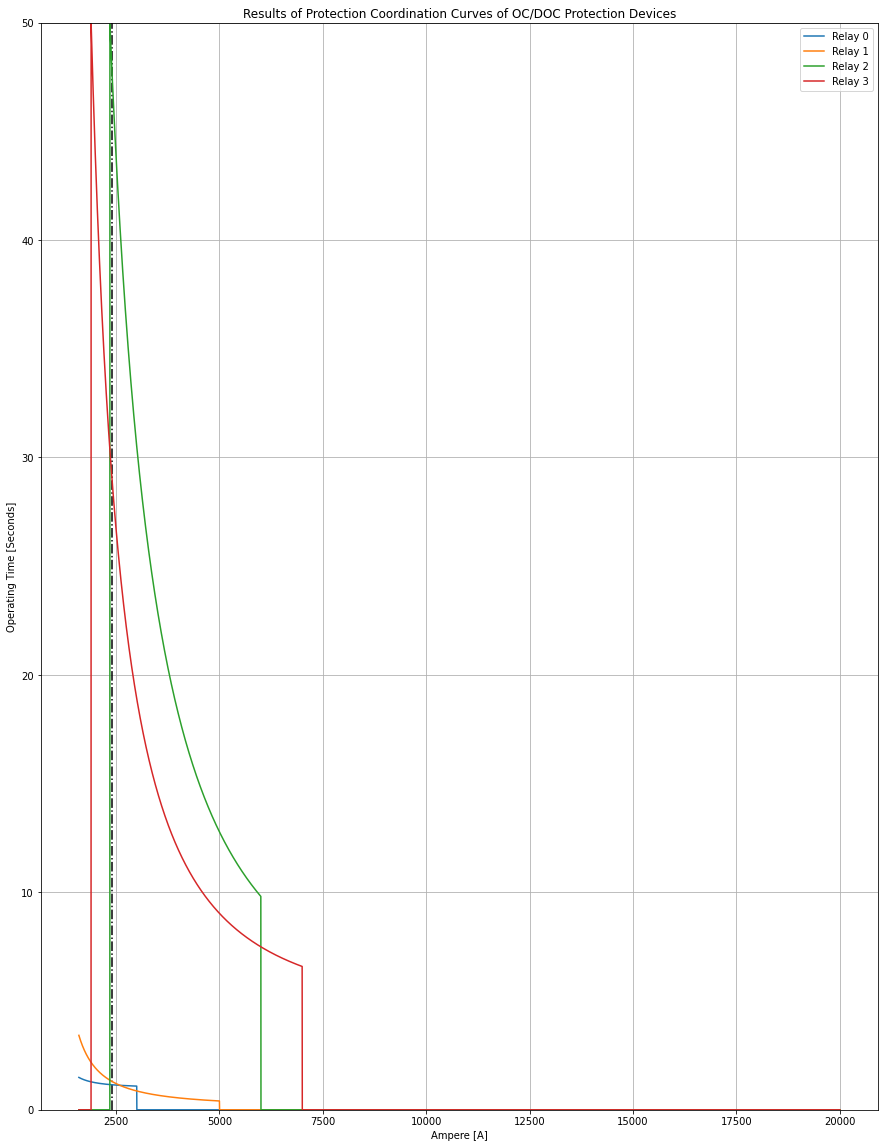

In [ ]:
output_file = GSA_Main(input_file,True)
MaxOpt = 0
gmin = 1.6
gmax = 20
plotI50n = True
nRelay=len(input_file[:,0])
output_file = np.array(output_file)
plt.figure(figsize=(15,20))
for i in range(nRelay):
  Ip = input_file[i,3]
  I51 = input_file[i,4]
  TDS = input_file[i,0]
  A = output_file[0][i][1]
  B = output_file[0][i][2]
  C = output_file[0][i][3]
  I50n = input_file[i,19]
  If = np.linspace(gmin*Ip, gmax*Ip, num=10000)
  t = np.zeros((len(If),1))         # allocate y with float elements
  for j in range(len(If)):
    if (If[j]/Ip)**B < 1:
      continue
    else:
      if ((operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)<50) and (operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)>0)):
        t[j] = operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)
  plt.plot(If,np.array(t).reshape(-1),label=f"Relay {i}")
  MaxOpt = max(MaxOpt,max(t))
plt.vlines(I51,0,MaxOpt[0],linestyles='dashdot')
plt.grid(True)
plt.xlabel('Ampere [A]')
plt.ylabel('Operating Time [Seconds]')
plt.ylim(0,50)
plt.title('Results of Protection Coordination Curves of OC/DOC Protection Devices')
plt.legend()
plt.show()

# PSO

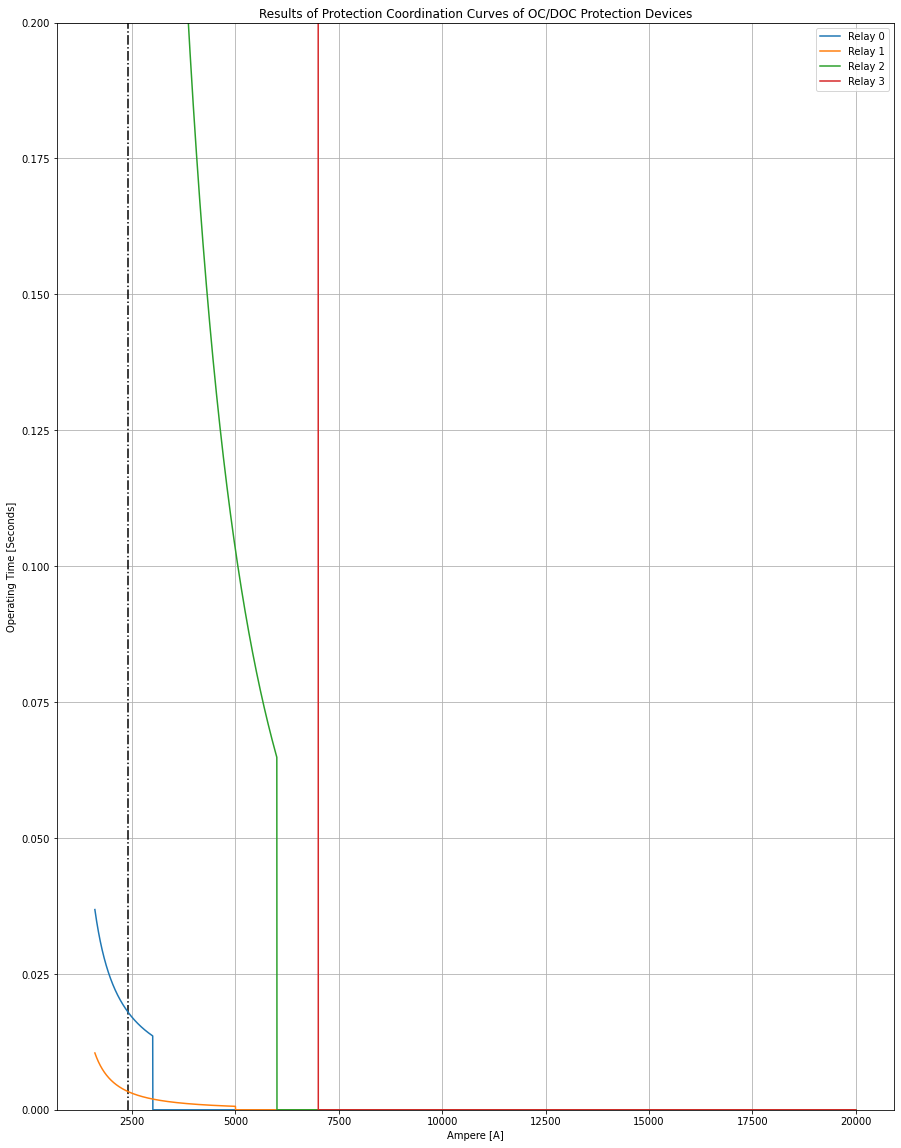

In [ ]:
input_file = np.array(pd.read_csv('inputs.csv'))
output_file = PSO_Main(input_file,PSO_top_functions)
MaxOpt = 0
gmin = 1.6
gmax = 20
plotI50n = True
nRelay=len(input_file[:,0])
output_file = np.array(output_file)
plt.figure(figsize=(15,20))
for i in range(nRelay):
  Ip = input_file[i,3]
  I51 = input_file[i,4]
  TDS = input_file[i,0]
  A = output_file[0][i][1]
  B = output_file[0][i][2]
  C = output_file[0][i][3]
  I50n = input_file[i,19]
  If = np.linspace(gmin*Ip, gmax*Ip, num=10000)
  t = np.zeros((len(If),1))         # allocate y with float elements
  for j in range(len(If)):
    if (If[j]/Ip)**B < 1:
      continue
    else:
      if ((operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)<50) and (operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)>0)):
        t[j] = operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)
  plt.plot(If,np.array(t).reshape(-1),label=f"Relay {i}")
  MaxOpt = max(MaxOpt,max(t))
plt.vlines(I51,0,MaxOpt[0],linestyles='dashdot')
plt.grid(True)
plt.xlabel('Ampere [A]')
plt.ylabel('Operating Time [Seconds]')
plt.ylim(0,0.2)
plt.title('Results of Protection Coordination Curves of OC/DOC Protection Devices')
plt.legend()
plt.show()